<a href="https://colab.research.google.com/github/amicarellade/cs4342-finalp/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project 


## Steps



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dante's repositories 

# df = pd.read_csv('/content/drive/MyDrive/CS 4342 ML/Final Project CS4342/Time Americans Spend Sleeping.csv')
df = pd.read_csv('/content/drive/MyDrive/Time Americans Spend Sleeping.csv')
df

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both
...,...,...,...,...,...,...,...,...,...
940,940,2013,Annual,8.83,0.085,Nonholiday weekdays,65 years and over,Sleeping,Women
941,941,2014,Annual,8.98,0.086,Nonholiday weekdays,65 years and over,Sleeping,Women
942,942,2015,Annual,8.83,0.074,Nonholiday weekdays,65 years and over,Sleeping,Women
943,943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,Women


In [ ]:
# Mason's Repositories
df = pd.read_csv('/content/Time Americans Spend Sleeping.csv')
df.head()

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


# EDA

In [4]:
# droppin index column

df.drop('index',axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x7fb5390232e0>,
 <a list of 15 Text major ticklabel objects>)

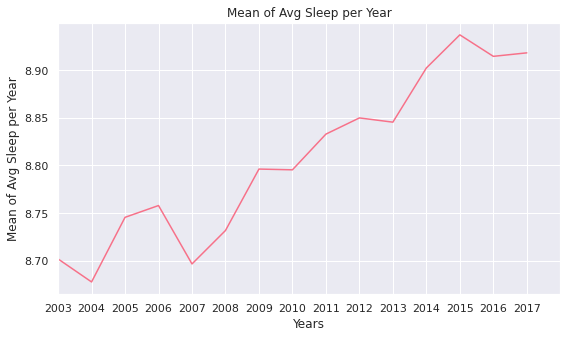

In [ ]:
plt.figure(figsize=(9,5))
sns.set_palette('husl')
plt.plot(df.groupby('Year')['Avg hrs per day sleeping'].mean())
plt.ylabel('Mean of Avg Sleep per Year')
plt.xlabel('Years')
plt.title('Mean of Avg Sleep per Year')
plt.xlim(2003,2018)
plt.xticks([*range(2003,2018)])

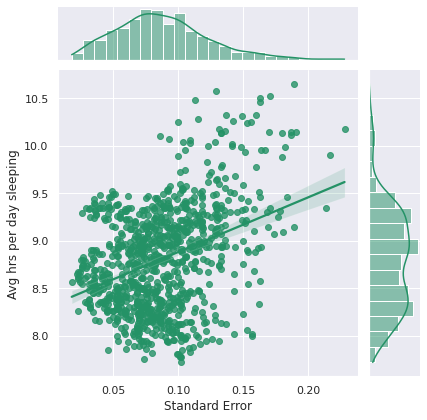

In [ ]:
sns.set_palette('summer')
sns.jointplot(kind='reg',y='Avg hrs per day sleeping',x='Standard Error',data=df)

# One-hot Encode (Option 1)

In [5]:
df['Sex'].value_counts()

Both     315
Men      315
Women    315
Name: Sex, dtype: int64

In [6]:
# Add One Hot Encoding to ShelveLoc
# df5['Bad'] = np.where((df5.ShelveLoc == 'Bad'), 1, 0)
# df5['Medium'] = np.where((df5.ShelveLoc == 'Medium'), 1, 0)
# df5['Good'] = np.where((df5.ShelveLoc == 'Good'), 1, 0)
# df5 = df5.drop(['ShelveLoc'], axis=1)
# df5

# One-hot encoding Sex category

df['Both'] = np.where((df.Sex == 'Both'), 1, 0)
df['Female'] = np.where((df.Sex == 'Women'), 1, 0)
df['Male'] = np.where((df.Sex == 'Men'), 1, 0)
df = df.drop(['Sex'], axis = 1)
df




,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Both,Female,Male
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,1,0,0
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,1,0,0
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,1,0,0
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,1,0,0
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,1,0,0
...,...,...,...,...,...,...,...,...,...,...
940,2013,Annual,8.83,0.085,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
941,2014,Annual,8.98,0.086,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
942,2015,Annual,8.83,0.074,Nonholiday weekdays,65 years and over,Sleeping,0,1,0
943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,0,1,0


In [7]:
df['Type of Days'].value_counts()


All days                     315
Nonholiday weekdays          315
Weekend days and holidays    315
Name: Type of Days, dtype: int64

In [8]:
df['All days'] = np.where((df['Type of Days'] == 'All days'), 1, 0)
df['Weekdays'] = np.where((df['Type of Days'] == 'Nonholiday weekdays'), 1, 0)
df['WeekendsHolidays'] = np.where((df['Type of Days'] == 'Weekend days and holidays'), 1, 0)
df = df.drop(['Type of Days'], axis = 1)
df

,Year,Period,Avg hrs per day sleeping,Standard Error,Age Group,Activity,Both,Female,Male,All days,Weekdays,WeekendsHolidays
0,2003,Annual,8.57,0.018,15 years and over,Sleeping,1,0,0,1,0,0
1,2004,Annual,8.55,0.026,15 years and over,Sleeping,1,0,0,1,0,0
2,2005,Annual,8.62,0.023,15 years and over,Sleeping,1,0,0,1,0,0
3,2006,Annual,8.63,0.024,15 years and over,Sleeping,1,0,0,1,0,0
4,2007,Annual,8.57,0.024,15 years and over,Sleeping,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
940,2013,Annual,8.83,0.085,65 years and over,Sleeping,0,1,0,0,1,0
941,2014,Annual,8.98,0.086,65 years and over,Sleeping,0,1,0,0,1,0
942,2015,Annual,8.83,0.074,65 years and over,Sleeping,0,1,0,0,1,0
943,2016,Annual,8.92,0.071,65 years and over,Sleeping,0,1,0,0,1,0


In [9]:
df['Age Group'].value_counts()


15 years and over    135
15 to 24 years       135
25 to 34 years       135
35 to 44 years       135
45 to 54 years       135
55 to 64 years       135
65 years and over    135
Name: Age Group, dtype: int64

In [10]:
df['U15'] = np.where((df['Age Group'] == '15 years and over'), 1, 0)
df['15-24'] = np.where((df['Age Group'] == '15 to 24 years'), 1, 0)
df['25-34'] = np.where((df['Age Group'] == '25 to 34 years'), 1, 0)
df['35-44'] = np.where((df['Age Group'] == '35 to 44 years'), 1, 0)
df['45-54'] = np.where((df['Age Group'] == '45 to 54 years'), 1, 0)
df['55-64'] = np.where((df['Age Group'] == '55 to 64 years'), 1, 0)
df['65+'] = np.where((df['Age Group'] == '65 years and over'), 1, 0)
df = df.drop(['Age Group'], axis = 1)
df

,Year,Period,Avg hrs per day sleeping,Standard Error,Activity,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
0,2003,Annual,8.57,0.018,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
1,2004,Annual,8.55,0.026,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
2,2005,Annual,8.62,0.023,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
3,2006,Annual,8.63,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
4,2007,Annual,8.57,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2013,Annual,8.83,0.085,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
941,2014,Annual,8.98,0.086,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
942,2015,Annual,8.83,0.074,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
943,2016,Annual,8.92,0.071,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      945 non-null    int64  
 1   Period                    945 non-null    object 
 2   Avg hrs per day sleeping  945 non-null    float64
 3   Standard Error            945 non-null    float64
 4   Activity                  945 non-null    object 
 5   Both                      945 non-null    int64  
 6   Female                    945 non-null    int64  
 7   Male                      945 non-null    int64  
 8   All days                  945 non-null    int64  
 9   Weekdays                  945 non-null    int64  
 10  WeekendsHolidays          945 non-null    int64  
 11  U15                       945 non-null    int64  
 12  15-24                     945 non-null    int64  
 13  25-34                     945 non-null    int64  
 14  35-44     

In [12]:
df.describe()

,Year,Avg hrs per day sleeping,Standard Error,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2010.000000,8.806868,0.086958,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,4.322782,0.545001,0.034631,0.471654,0.471654,0.471654,0.471654,0.471654,0.471654,0.350112,0.350112,0.350112,0.350112,0.350112,0.350112,0.350112
min,2003.000000,7.720000,0.018000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,8.360000,0.063000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,8.810000,0.084000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.190000,0.106000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,10.650000,0.228000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#  Finding null value percentage 

pd.DataFrame((100*df.isnull().sum()/len(df)),columns=['Null %'])


,Null %
Year,0.0
Period,0.0
Avg hrs per day sleeping,0.0
Standard Error,0.0
Activity,0.0
Both,0.0
Female,0.0
Male,0.0
All days,0.0
Weekdays,0.0


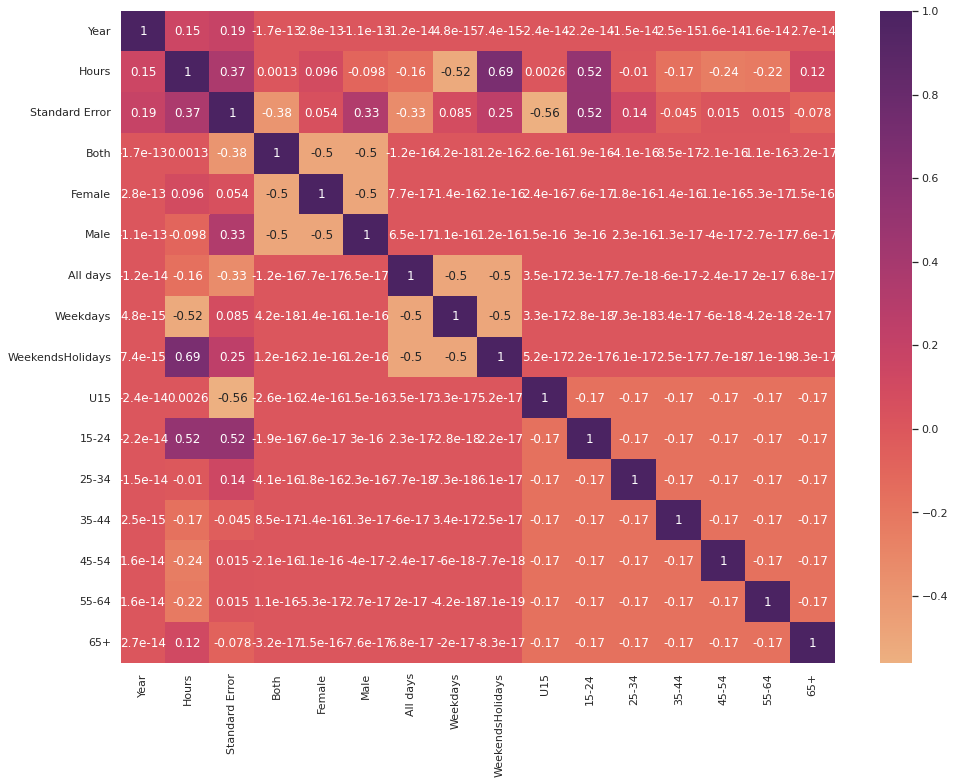

In [15]:
# Correlation of variables

sns.set(rc={"figure.figsize":(16, 12)}) #width=12, #height=12
sns.heatmap(df.corr(),cmap='flare',annot=True)



# Bagging Regressor

In [14]:
df.rename(columns = {'Avg hrs per day sleeping':'Hours'}, inplace = True)
df.rename(columns = {'Type of Days':'Days'}, inplace = True)
df.rename(columns = {'Age Group':'Age'}, inplace = True)
df

,Year,Period,Hours,Standard Error,Activity,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
0,2003,Annual,8.57,0.018,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
1,2004,Annual,8.55,0.026,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
2,2005,Annual,8.62,0.023,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
3,2006,Annual,8.63,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
4,2007,Annual,8.57,0.024,Sleeping,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2013,Annual,8.83,0.085,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
941,2014,Annual,8.98,0.086,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
942,2015,Annual,8.83,0.074,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1
943,2016,Annual,8.92,0.071,Sleeping,0,1,0,0,1,0,0,0,0,0,0,0,1


In [16]:
# Dropping Period, SE, Activity

dfBag = df.drop(columns=['Period', 'Standard Error','Activity'])
dfBag

,Year,Hours,Both,Female,Male,All days,Weekdays,WeekendsHolidays,U15,15-24,25-34,35-44,45-54,55-64,65+
0,2003,8.57,1,0,0,1,0,0,1,0,0,0,0,0,0
1,2004,8.55,1,0,0,1,0,0,1,0,0,0,0,0,0
2,2005,8.62,1,0,0,1,0,0,1,0,0,0,0,0,0
3,2006,8.63,1,0,0,1,0,0,1,0,0,0,0,0,0
4,2007,8.57,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2013,8.83,0,1,0,0,1,0,0,0,0,0,0,0,1
941,2014,8.98,0,1,0,0,1,0,0,0,0,0,0,0,1
942,2015,8.83,0,1,0,0,1,0,0,0,0,0,0,0,1
943,2016,8.92,0,1,0,0,1,0,0,0,0,0,0,0,1


In [17]:
X = dfBag.loc[:, dfBag.columns != 'Hours']
y = dfBag['Hours']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dregr = DecisionTreeRegressor(random_state=0)
dregr.fit(x_train, y_train)
pred = dregr.predict(x_test)
print("The R squared vaule is:", dregr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.9271431610496806
The MSE is: 0.01941481481481481


[Text(0.7349541508735684, 0.9705882352941176, '8.63 <= 0.5\nsquared_error = 0.304\nsamples = 756\nvalue = 8.8'),
 Text(0.5378477701229828, 0.9117647058823529, '8.6 <= 0.5\nsquared_error = 0.158\nsamples = 508\nvalue = 8.532'),
 Text(0.4294175600273295, 0.8529411764705882, '8.74 <= 0.5\nsquared_error = 0.096\nsamples = 441\nvalue = 8.433'),
 Text(0.3001417311946903, 0.7941176470588235, '8.55 <= 0.5\nsquared_error = 0.07\nsamples = 374\nvalue = 8.353'),
 Text(0.16261671980739198, 0.7352941176470589, '8.57 <= 2011.5\nsquared_error = 0.049\nsamples = 187\nvalue = 8.194'),
 Text(0.10998096694429985, 0.6764705882352942, '8.57 <= 0.5\nsquared_error = 0.036\nsamples = 115\nvalue = 8.114'),
 Text(0.08246844091618949, 0.6176470588235294, '8.71 <= 0.5\nsquared_error = 0.028\nsamples = 93\nvalue = 8.061'),
 Text(0.05600923997917751, 0.5588235294117647, '8.83 <= 0.5\nsquared_error = 0.024\nsamples = 69\nvalue = 8.112'),
 Text(0.03432457053617907, 0.5, '8.67 <= 0.5\nsquared_error = 0.01\nsamples = 4

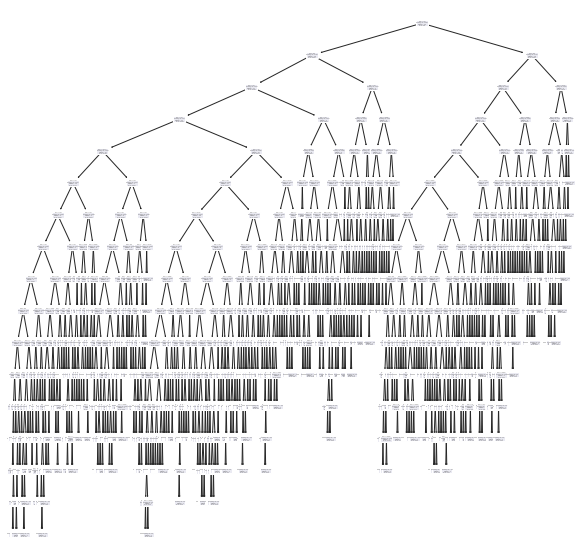

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dregr, feature_names=dfBag['Hours'])

In [22]:
cross_val_score(dregr, X, y, cv=20)


array([0.95884949, 0.97159904, 0.87867829, 0.94121115, 0.92432188,
       0.94094187, 0.90112068, 0.91617699, 0.95565019, 0.78780688,
       0.8795645 , 0.80169386, 0.74779988, 0.81277597, 0.93463803,
       0.76729237, 0.85061425, 0.87081015, 0.86022604, 0.40817914])

In [23]:
print(mean_squared_error(y_test, pred))

0.01941481481481481


In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

regr = BaggingRegressor(n_estimators=10, random_state=0)
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print("The R squared vaule is:", regr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.9592664271430664
The MSE is: 0.01085464021164022


In [25]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in regr.estimators_
], axis=0)

print(feature_importances)

[0.05395206 0.00215952 0.01087053 0.00882411 0.02629514 0.02301056
 0.48086951 0.01729952 0.26128007 0.02118841 0.00296068 0.00747068
 0.01195916 0.07186004]


Feature: 0, Score: 0.05306
Feature: 1, Score: 0.00256
Feature: 2, Score: 0.01236
Feature: 3, Score: 0.00618
Feature: 4, Score: 0.04209
Feature: 5, Score: 0.00767
Feature: 6, Score: 0.48273
Feature: 7, Score: 0.01888
Feature: 8, Score: 0.26359
Feature: 9, Score: 0.02080
Feature: 10, Score: 0.00209
Feature: 11, Score: 0.00524
Feature: 12, Score: 0.01370
Feature: 13, Score: 0.06904


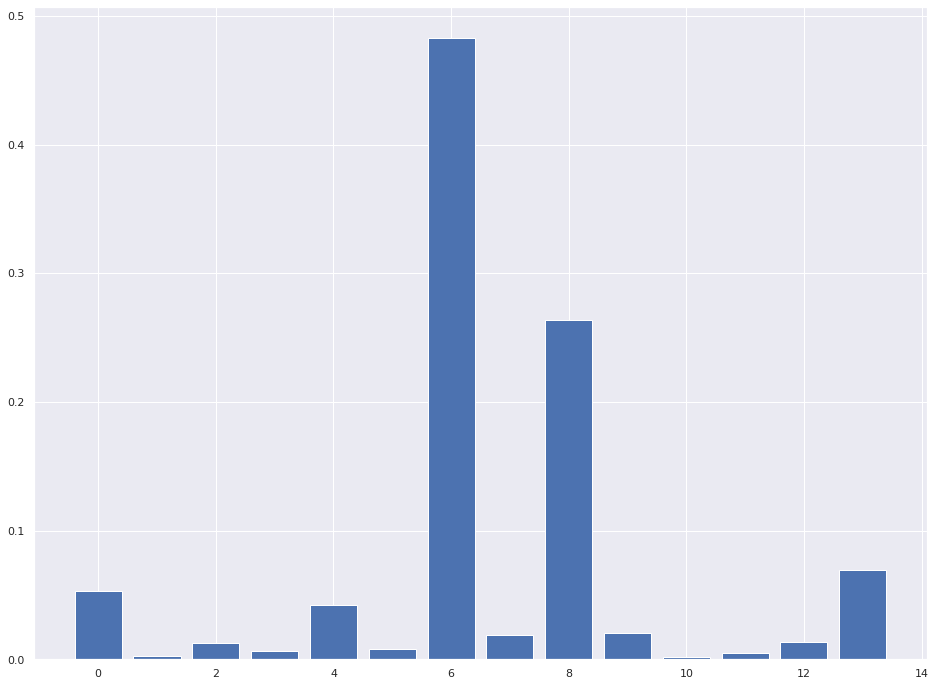

In [26]:
from matplotlib import pyplot
importance = dregr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [36]:
regr = BaggingRegressor(n_estimators=10, random_state=0)
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print("The R squared vaule is:", regr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.9504829523157813
The MSE is: 0.013195251465974374


In [42]:
# Pruning the tree

X = dfBag[['Year', 'Female', 'Male', 'All days','Weekdays', 'WeekendsHolidays', 'U15','15-24', '25-34','55-64', '65+']]
y = dfBag['Hours']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
dregr = DecisionTreeRegressor(random_state=0)
dregr.fit(x_train, y_train)
pred = dregr.predict(x_test)
print("The R squared vaule is:", dregr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.925484255262822
The MSE is: 0.0198568783068783


In [45]:
cross_val_score(dregr, X, y, cv=20)

array([0.95626634, 0.9721161 , 0.87570865, 0.91077544, 0.90973058,
       0.95900286, 0.92951644, 0.87506418, 0.97266503, 0.90653765,
       0.8612385 , 0.7734634 , 0.87035496, 0.92882366, 0.97647511,
       0.8494605 , 0.85969554, 0.89052397, 0.89254904, 0.60539113])

[Text(0.7260733468191964, 0.9705882352941176, '8.6 <= 0.5\nsquared_error = 0.304\nsamples = 756\nvalue = 8.8'),
 Text(0.5289649600074404, 0.9117647058823529, '8.67 <= 0.5\nsquared_error = 0.158\nsamples = 508\nvalue = 8.532'),
 Text(0.41555640811011907, 0.8529411764705882, '8.74 <= 0.5\nsquared_error = 0.096\nsamples = 441\nvalue = 8.433'),
 Text(0.29138067336309526, 0.7941176470588235, '8.57 <= 0.5\nsquared_error = 0.07\nsamples = 374\nvalue = 8.353'),
 Text(0.17595331101190476, 0.7352941176470589, '8.67 <= 0.5\nsquared_error = 0.041\nsamples = 187\nvalue = 8.513'),
 Text(0.11872209821428571, 0.6764705882352942, '8.71 <= 0.5\nsquared_error = 0.038\nsamples = 147\nvalue = 8.466'),
 Text(0.06869419642857143, 0.6176470588235294, '8.57 <= 2010.5\nsquared_error = 0.022\nsamples = 108\nvalue = 8.396'),
 Text(0.039248511904761904, 0.5588235294117647, '8.55 <= 0.5\nsquared_error = 0.013\nsamples = 54\nvalue = 8.308'),
 Text(0.022544642857142857, 0.5, '8.62 <= 0.5\nsquared_error = 0.01\nsample

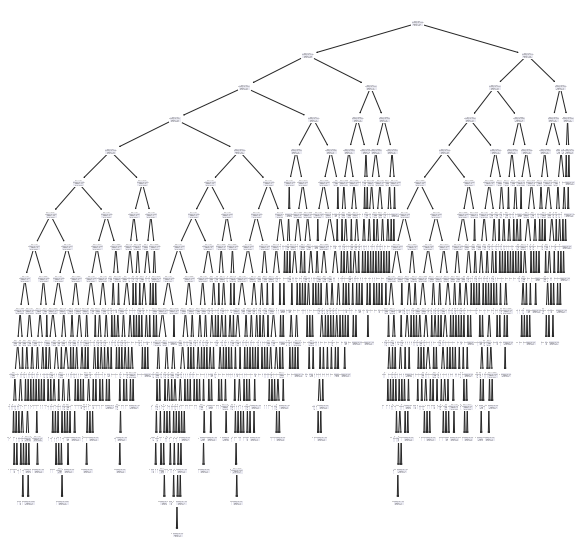

In [46]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dregr, feature_names=df['Hours'])

Feature: 0, Score: 0.05222
Feature: 1, Score: 0.01339
Feature: 2, Score: 0.00849
Feature: 3, Score: 0.00063
Feature: 4, Score: 0.04937
Feature: 5, Score: 0.48504
Feature: 6, Score: 0.01897
Feature: 7, Score: 0.26485
Feature: 8, Score: 0.02197
Feature: 9, Score: 0.01561
Feature: 10, Score: 0.06946


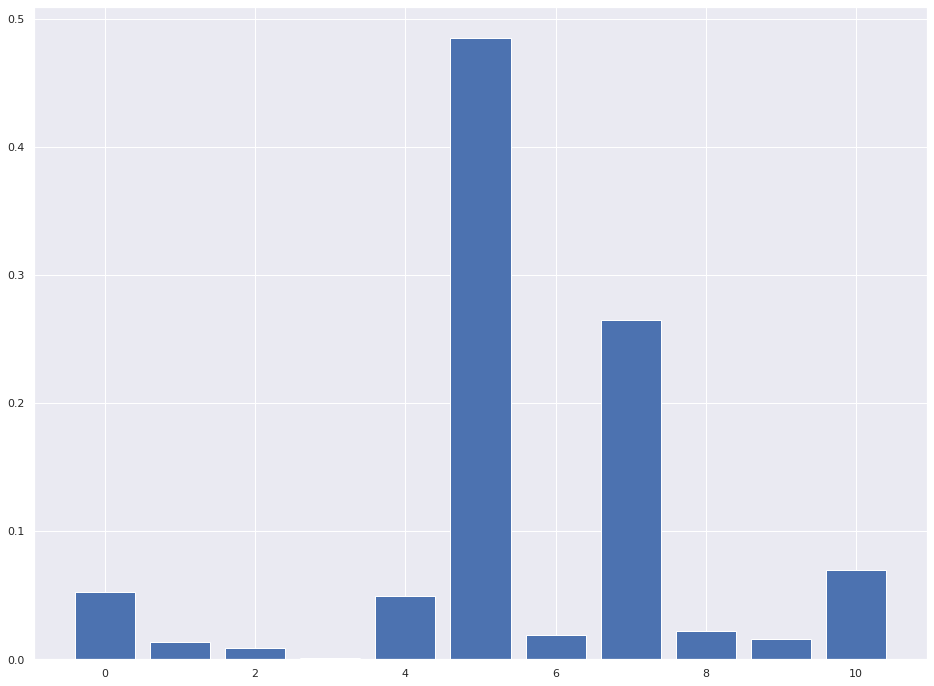

In [47]:
importance = dregr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [38]:
X = dfBag[['Year', 'All days', 'WeekendsHolidays', 'U15','55-64']]
y = dfBag['Hours']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
dregr = DecisionTreeRegressor(random_state=0)
dregr.fit(x_train, y_train)
pred = dregr.predict(x_test)
print("The R squared vaule is:", dregr.score(x_test, y_test))
print("The MSE is:", mean_squared_error(y_test, pred))

The R squared vaule is: 0.38880365282376517
The MSE is: 0.16287096814630397


[Text(0.62467277486911, 0.9545454545454546, '8.62 <= 0.5\nsquared_error = 0.304\nsamples = 756\nvalue = 8.8'),
 Text(0.3795811518324607, 0.8636363636363636, '8.55 <= 0.5\nsquared_error = 0.158\nsamples = 508\nvalue = 8.532'),
 Text(0.20026178010471204, 0.7727272727272727, '8.57 <= 2010.5\nsquared_error = 0.148\nsamples = 251\nvalue = 8.379'),
 Text(0.11354712041884817, 0.6818181818181818, '8.57 <= 0.5\nsquared_error = 0.125\nsamples = 136\nvalue = 8.275'),
 Text(0.04908376963350786, 0.5909090909090909, '8.57 <= 2003.5\nsquared_error = 0.139\nsamples = 117\nvalue = 8.302'),
 Text(0.02617801047120419, 0.5, '8.63 <= 0.5\nsquared_error = 0.109\nsamples = 15\nvalue = 8.207'),
 Text(0.020942408376963352, 0.4090909090909091, 'squared_error = 0.134\nsamples = 12\nvalue = 8.193'),
 Text(0.031413612565445025, 0.4090909090909091, 'squared_error = 0.007\nsamples = 3\nvalue = 8.26'),
 Text(0.07198952879581152, 0.5, '8.57 <= 2007.5\nsquared_error = 0.141\nsamples = 102\nvalue = 8.316'),
 Text(0.0418

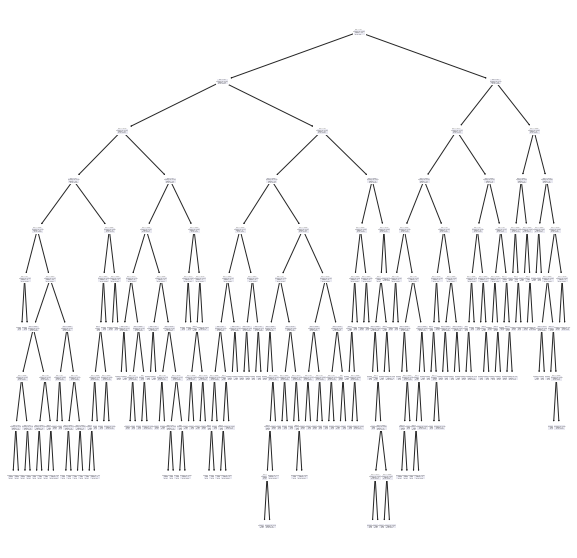

In [41]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dregr, feature_names=df['Hours'])

# One-hot Encode (Option 2)

In [ ]:
column_list = df.keys()
print('Columns List :\n', list(column_list), '\n')

df.rename(columns = {'Avg hrs per day sleeping':'Hours'}, inplace = True)
df.rename(columns = {'Type of Days':'Days'}, inplace = True)
df.rename(columns = {'Age Group':'Age'}, inplace = True)

categorical_features = ['Year', 'Period','Days', 'Age', 'Activity', 'Sex']
categories = df[categorical_features]

print('\nCategorical Feature Values\n')

categories_unique = pd.Series({col: categories[col].unique() for col in categories})
for item in categories_unique.items():
    print(item[0], ':\n', item[1], '\n')

Columns List :
 ['Year', 'Period', 'Avg hrs per day sleeping', 'Standard Error', 'Type of Days', 'Age Group', 'Activity', 'Sex'] 


Categorical Feature Values

Year :
 [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017] 

Period :
 ['Annual'] 

Days :
 ['All days' 'Nonholiday weekdays' 'Weekend days and holidays'] 

Age :
 ['15 years and over' '15 to 24 years' '25 to 34 years' '35 to 44 years'
 '45 to 54 years' '55 to 64 years' '65 years and over'] 

Activity :
 ['Sleeping'] 

Sex :
 ['Both' 'Men' 'Women'] 



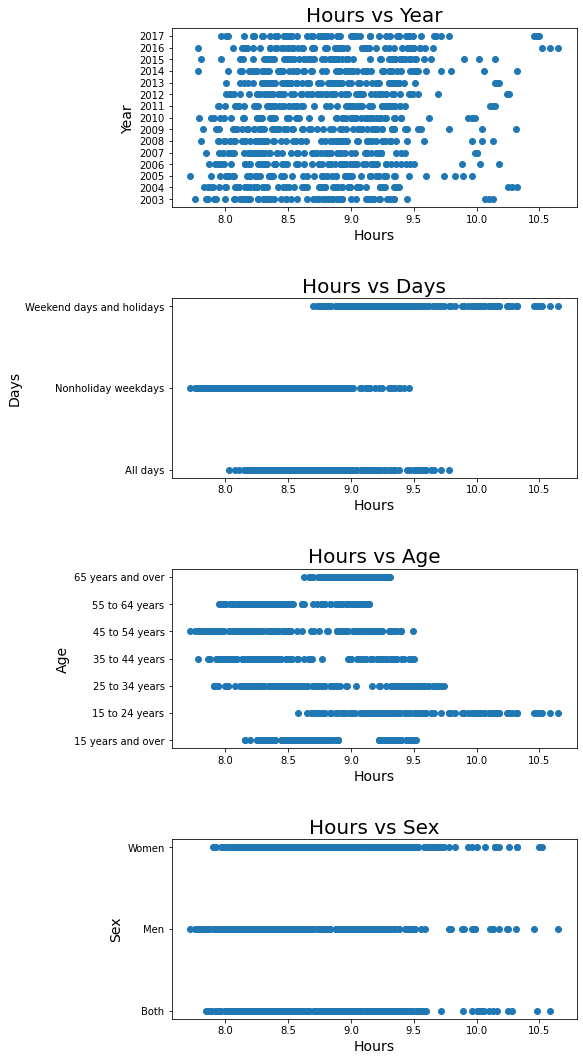

In [ ]:
import matplotlib.pyplot as plt

# Creating scatterplots for 

def createScatter(df, column_x, column_y, ax):
    labels = df[column_y].unique()
    ax.scatter(df[column_x], df[column_y])
    ax.set_yticks(df[column_y].unique())
    ax.set_xlabel(column_x, fontsize=14)
    ax.set_ylabel(column_y, fontsize=14)
    ax.set_title(column_x + ' vs ' + column_y, fontsize=20)


fig, axs = plt.subplots(4, 1, figsize=(8, 16))

fig.tight_layout(pad=7)

ax = axs[0]
createScatter(df, 'Hours', 'Year', ax)
ax = axs[1]
createScatter(df, 'Hours', 'Days', ax)
ax = axs[2]
createScatter(df, 'Hours', 'Age', ax)
ax = axs[3]
createScatter(df, 'Hours', 'Sex', ax)

plt.show()

In [ ]:
# one hot encode using sklearn

from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(handle_unknown='ignore', dtype=int)
df_encoded = pd.DataFrame(oh_encoder.fit_transform(df[['Days','Age','Sex']]).toarray(), columns=oh_encoder.get_feature_names_out())

# Concat the encoded data frame and the original
df_new = pd.concat([df.reset_index(drop=True),df_encoded.reset_index(drop=True)], axis=1)
df_new.drop(['Days','Age','Sex'], axis=1, inplace=True)

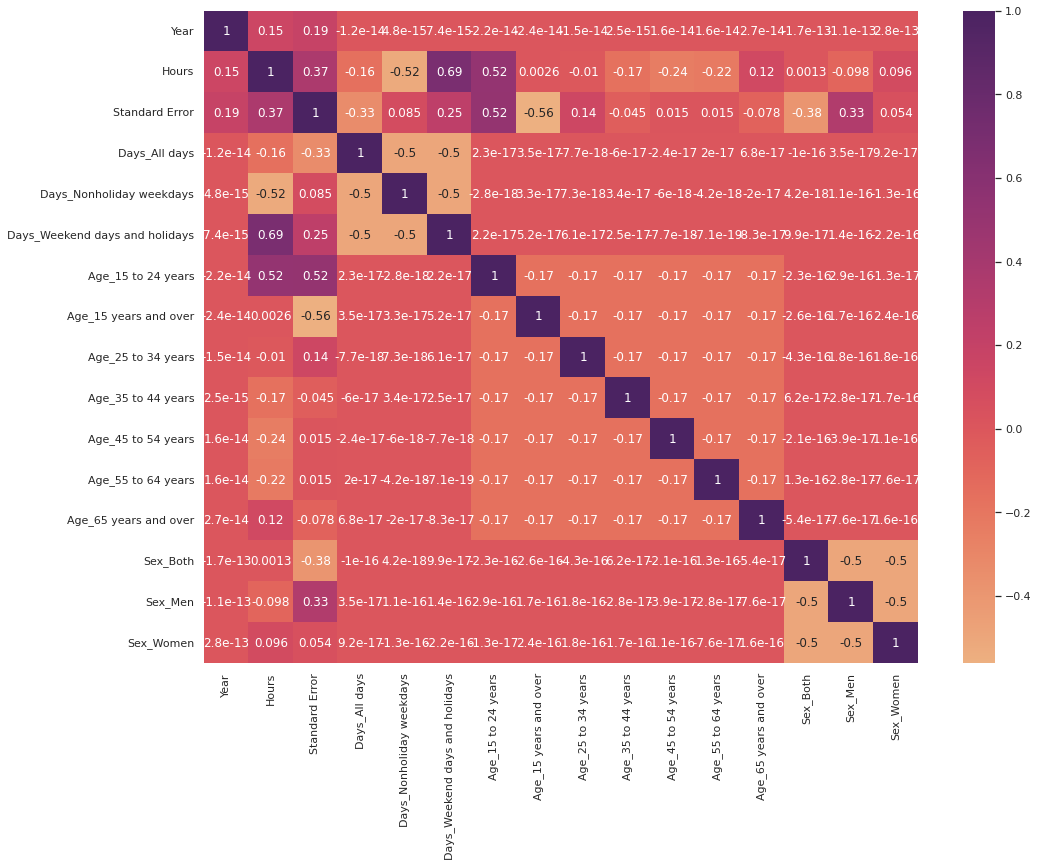

In [ ]:
sns.set(rc={"figure.figsize":(16, 12)}) #width=12, #height=12
sns.heatmap(df_new.corr(),cmap='flare',annot=True)

# Ridge Regression 



In [ ]:
import statsmodels.api       as sm

x_features = list(df_new.keys())
x_features.remove('Hours') # removing hours from predictors
x_features.remove('Period') # removing period from predictors
x_features.remove('Activity') # removing activity from predictors
x_features.remove('Standard Error') # removing SE from predictors
y_feature = ['Hours']

df_x = df_new[x_features]
df_y = df_new[y_feature]

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import metrics

def ridge_regression(X_train, X_test, y_train, y_test, alpha):
    # Fit the model
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(X_train, y_train)
    y_pred = ridgereg.predict(X_test)

    print("\n***Ridge Regression Coefficients ** alpha=" + str(alpha))
    print(ridgereg.intercept_)
    print(ridgereg.coef_)
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,test_size=0.2, random_state=0)


# creating a function to have Ridge run through different regularization strengths
alphaValues = [0,  0.2, 0.5, 0.7] 
for i in range(0, len(alphaValues)):
    ridge_regression(X_train, X_test, y_train, y_test,
                     alphaValues[i])


***Ridge Regression Coefficients ** alpha=0
[-30.51561314]
[[ 0.01956326 -0.12043763 -0.40918132  0.52890063  0.70406524  0.00413592
  -0.0254007  -0.21743281 -0.31461305 -0.2993102   0.14860134  0.00421592
  -0.07754741  0.07482273]]
Root Mean Squared Error: 0.1740362781045141

***Ridge Regression Coefficients ** alpha=0.2
[-24.47276504]
[[ 1.65570244e-02 -1.06968089e-01 -3.61587335e-01  4.67917444e-01
   6.03348661e-01 -1.09030516e-05 -2.35247402e-02 -1.84757231e-01
  -2.67976540e-01 -2.54707034e-01  1.27623060e-01  4.33766231e-03
  -6.91475464e-02  6.61266346e-02]]
Root Mean Squared Error: 0.17880719396714756

***Ridge Regression Coefficients ** alpha=0.5
[-18.26778428]
[[ 0.01347013 -0.09156714 -0.30785203  0.39887304  0.49687672 -0.00334186
  -0.02099785 -0.15072345 -0.2191818  -0.20810078  0.10542519  0.0042584
  -0.05948239  0.05634488]]
Root Mean Squared Error: 0.2080909070348739

***Ridge Regression Coefficients ** alpha=0.7
[-15.28437466]
[[ 0.01198592 -0.08353663 -0.2800951

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel